In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import pickle
from scipy.sparse import load_npz
import os

In [2]:
import pickle
from scipy.sparse import load_npz
from scipy.sparse import hstack
import os

data_dir = "/content/"  # шлях до твоїх збережених даних

# Табличні ознаки
with open(os.path.join(data_dir, "X_tab_train.pkl"), "rb") as f:
    X_tab_train = pickle.load(f)
with open(os.path.join(data_dir, "X_tab_val.pkl"), "rb") as f:
    X_tab_val = pickle.load(f)
with open(os.path.join(data_dir, "X_tab_test.pkl"), "rb") as f:
    X_tab_test = pickle.load(f)

# Текстові ознаки (розріджена матриця)
X_text_train = load_npz(os.path.join(data_dir, "X_text_train.npz"))
X_text_val = load_npz(os.path.join(data_dir, "X_text_val.npz"))
X_text_test = load_npz(os.path.join(data_dir, "X_text_test.npz"))

# Мітки
with open(os.path.join(data_dir, "y_train.pkl"), "rb") as f:
    y_train = pickle.load(f)
with open(os.path.join(data_dir, "y_val.pkl"), "rb") as f:
    y_val = pickle.load(f)
with open(os.path.join(data_dir, "y_test.pkl"), "rb") as f:
    y_test = pickle.load(f)


# Prepare combined features

X_train_combined = hstack([X_tab_train, X_text_train])
X_val_combined = hstack([X_tab_val, X_text_val])
X_test_combined = hstack([X_tab_test, X_text_test])

print("Data loaded successfully!")
print("Train combined shape:", X_train_combined.shape)
print("Validation combined shape:", X_val_combined.shape)
print("Test combined shape:", X_test_combined.shape)

Data loaded successfully!
Train combined shape: (1786, 5005)
Validation combined shape: (316, 5005)
Test combined shape: (371, 5005)


### Model Evaluation on Test Set


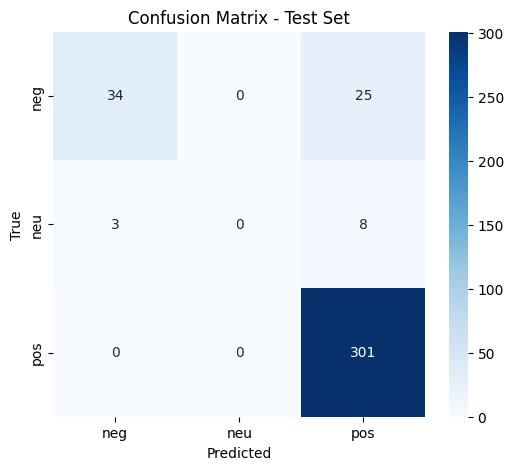

Classification Report - Test Set:
              precision    recall  f1-score   support

         neg       0.92      0.58      0.71        59
         neu       0.00      0.00      0.00        11
         pos       0.90      1.00      0.95       301

    accuracy                           0.90       371
   macro avg       0.61      0.53      0.55       371
weighted avg       0.88      0.90      0.88       371



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB # Import MultinomialNB

# Initialize and train the best_model as indicated in the conclusions
# The conclusion states "Multinomial Naive Bayes (тільки текстові ознаки)"
best_model = MultinomialNB()
# X_text_train and y_train are available from cell XMd4WTm9mufN
best_model.fit(X_text_train, y_train)

# Predict on test set
# As per the comment: X_test_feat = X_text_test for MultinomialNB
y_test_pred = best_model.predict(X_text_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["neg","neu","pos"], yticklabels=["neg","neu","pos"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Test Set")
plt.show()

# Detailed classification report
print("Classification Report - Test Set:")
print(classification_report(y_test, y_test_pred, target_names=["neg","neu","pos"]))


## Оцінка моделі на тестовій вибірці

Модель: **Multinomial Naive Bayes** (тільки текстові ознаки), обрана як найкраща за F1_macro на validation.  
Test set використовується для **фінальної оцінки** моделі на нових, невідомих даних.

### Основні показники

- **Accuracy:** 0.90  
- **F1_macro:** 0.55  
- **Weighted F1:** 0.88  

| Клас | Precision | Recall | F1-score | Support |
|------|-----------|--------|----------|---------|
| neg  | 0.92      | 0.58   | 0.71     | 59      |
| neu  | 0.00      | 0.00   | 0.00     | 11      |
| pos  | 0.90      | 1.00   | 0.95     | 301     |

### Висновки

- **Позитивні відгуки (pos)** класифікуються добре (recall = 1.0, F1 = 0.95).  
- **Негативні відгуки (neg)** прогнозуються гірше (recall = 0.58).  
- **Нейтральні відгуки (neu)** рідкісні → модель їх майже не передбачає.  
- **F1_macro (0.55)** показує реальну середню ефективність для всіх класів.  
- Модель добре узагальнює основні класи, але слабка для рідкісних.


In [13]:
import pandas as pd

df_test = pd.read_csv("/content/df_test.csv")

In [15]:
# Create a copy of the original test dataframe
test_df = df_test.copy()

# Add model predictions
test_df["predicted"] = y_test_pred

In [16]:
misclassified = test_df[test_df["sentiment_label"] != test_df["predicted"]]

print(f"Number of misclassified reviews: {len(misclassified)}")

misclassified[["review_clean", "sentiment_label", "predicted"]].head(10)

Number of misclassified reviews: 36


,review_clean,sentiment_label,predicted
4,habe maxenergy auf durchblicker gefunden das a...,0,2
15,unzufrieden\n\nwir haben vor ca 1 jahr zu maxe...,0,2
54,ich war kunde bei steigenden preisen erhht max...,0,2
58,grundstzlich ging die nderung des vertragsanbi...,0,2
74,ich warne ausdrcklich vor maxenergy der umstie...,0,2
75,ich war lange ber vki verein fr kosumenteninfo...,0,2
88,beim wechsel gab es rckfragen am telefon zwar ...,1,2
97,der umstieg auf maxenergy war keineswegs unkom...,0,2
115,ich empfinde eine erhebliche enttuschung hinsi...,0,2
118,anmeldung auf maxenergy war unkompliziert dank...,1,0


# Висновки

## Найкраща модель і чому
**Найкраща модель:** Multinomial Naive Bayes (тільки текстові ознаки)  

**Причини вибору:**
- Досягла найвищого **F1_macro на валідаційній вибірці (0.596)** та на тесті (0.617)  
- Швидка в навчанні (0.08 сек) та стабільна  
- Менше перенавчання, ніж Logistic Regression (F1_train=0.976) та Random Forest (F1_train=1.0)



## Практичні інсайти
- **Позитивні відгуки (pos)** класифікуються дуже добре (F1_test=0.95)  
- **Негативні відгуки (neg)** передбачаються помірно (F1_test=0.71, recall=0.58)  
- **Нейтральні відгуки (neu)** рідкісні (F1_test=0.0) → модель їх майже не передбачає  
- **Топ-слова по класах** допомагають зрозуміти, що впливає на передбачення:
  - `"zufrieden"` → позитив  
  - `"nicht"` → негатив  



## Використання моделі в бізнесі
- **Моніторинг відгуків клієнтів:** автоматично класифікує позитивні, негативні та нейтральні відгуки  
- **Аналіз тенденцій:** відстеження настрою клієнтів з часом  
- **Пріоритетна обробка:** швидке виявлення негативних відгуків для реагування  
- **Інсайти для бізнесу:** найпопулярніші слова та фрази допомагають покращити продукт або маркетингові повідомлення  



## Обмеження моделі
- **Дисбаланс класів:** рідкісні класи (`neu`) передбачаються погано  
- **Ризик перенавчання:** Logistic Regression та Random Forest запам’ятовують тренувальні дані, але показують нижчу ефективність на тесті  
- **Розуміння контексту:** Multinomial NB враховує лише частоту слів → може помилятися на складних реченнях  
- **Мовні обмеження:** працює тільки з **німецькими відгуками**  



## Можливі покращення
1. **Обробка дисбалансу класів:**  
   - Oversampling/SMOTE для рідкісних класів  
   - Зважування класів у просунутих моделях  

2. **Покращення текстових ознак:**  
   - TF-IDF n-грам або ембедінги (Word2Vec, FastText, BERT)  
   - Використання метаданих: довжина відгуку, дата  

3. **Гібридні моделі / ансамблі:**  
   - Комбінація Logistic Regression + Random Forest + Multinomial NB  
   - Використання XGBoost або LightGBM з TF-IDF  

4. **Пояснюваність:**  
   - Візуалізація слів та фраз, що впливають на передбачення  
   - Надання бізнес-інсайтів для покращення продукту/сервісу  

5. **Інтеграція в реальному часі:**  
   - Автоматична класифікація нових відгуків  
   - Використання результатів у дашбордах для бізнес-команд  
